In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/1730285311-creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.759061e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.251130e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.654937e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.321385e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


In [6]:
df.shape

(284807, 31)

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
fruad_case = len(df[df['Class']==1])
fruad_case

492

In [9]:
non_furad = len(df[df['Class']==0])
non_furad

284315

In [10]:
fruad = df[df['Class']==1]
genuine = df[df['Class']==0]

In [11]:
fruad.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [12]:
genuine.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


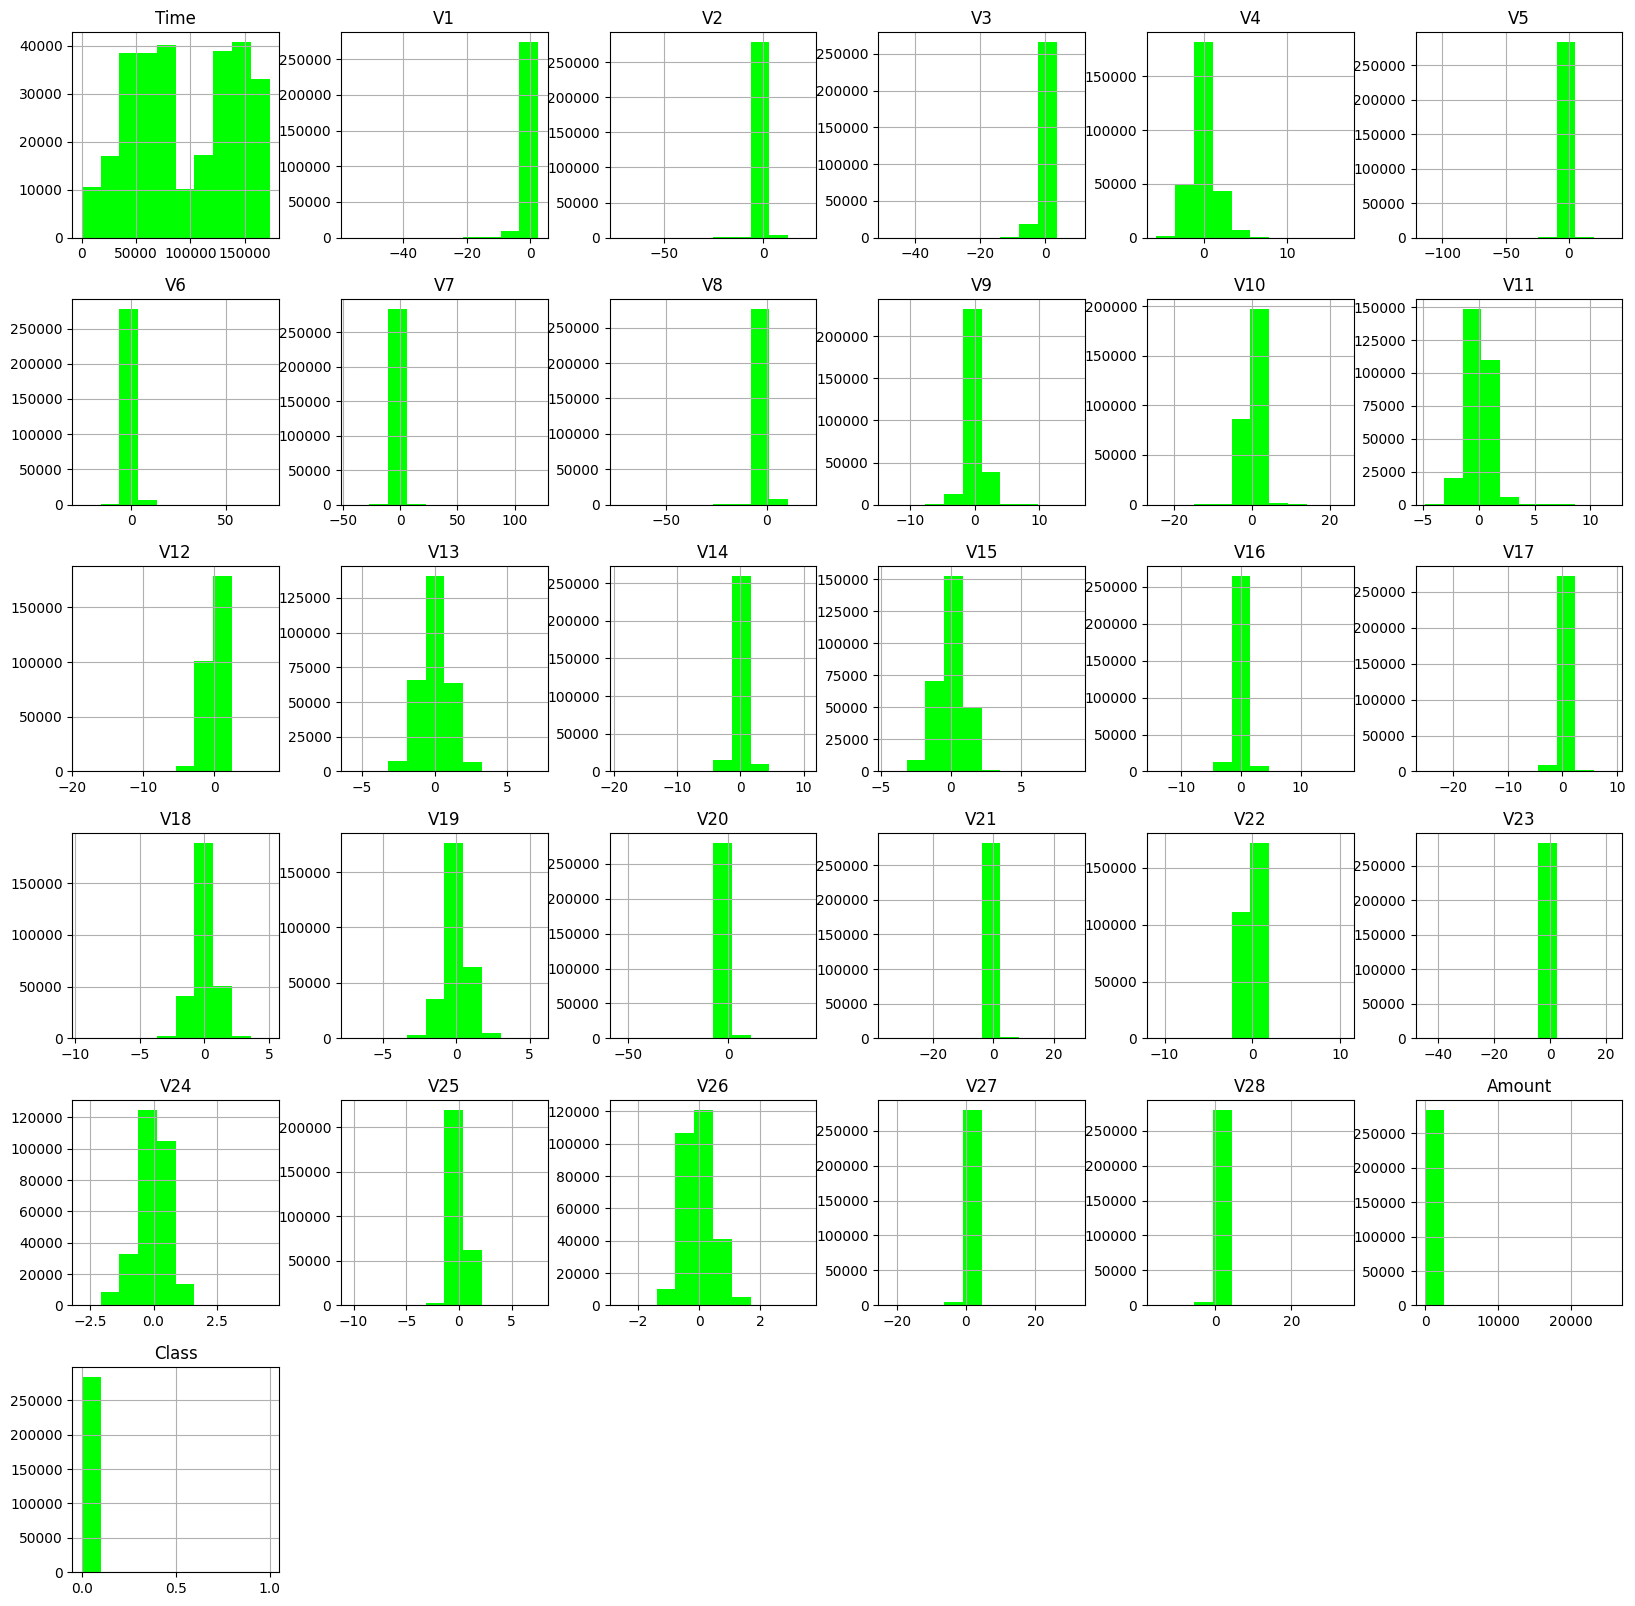

In [13]:
df.hist(figsize=(20,20),color='lime')
plt.show()

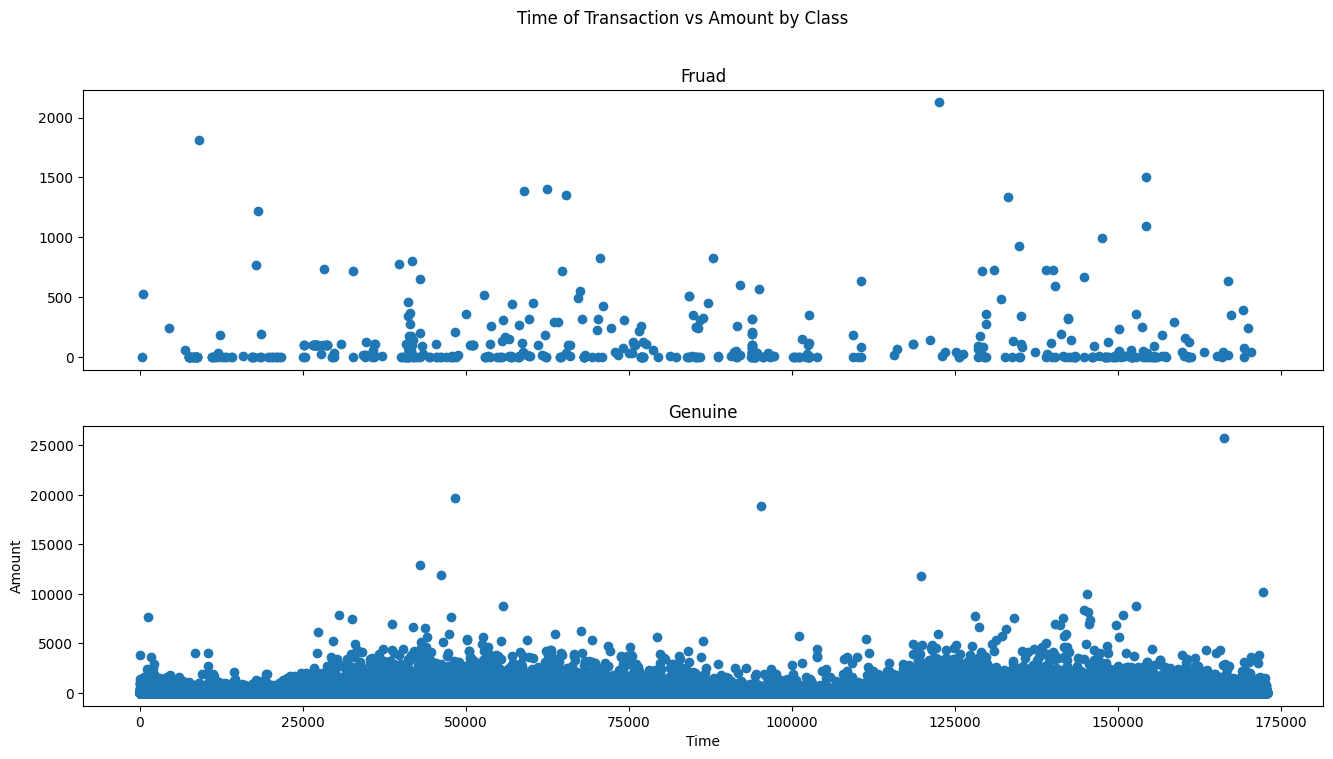

In [14]:
rcParams['figure.figsize'] = 16,8
f,(ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Time of Transaction vs Amount by Class')
ax1.scatter(fruad.Time,fruad.Amount)
ax1.set_title('Fruad')
ax2.scatter(genuine.Time,genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

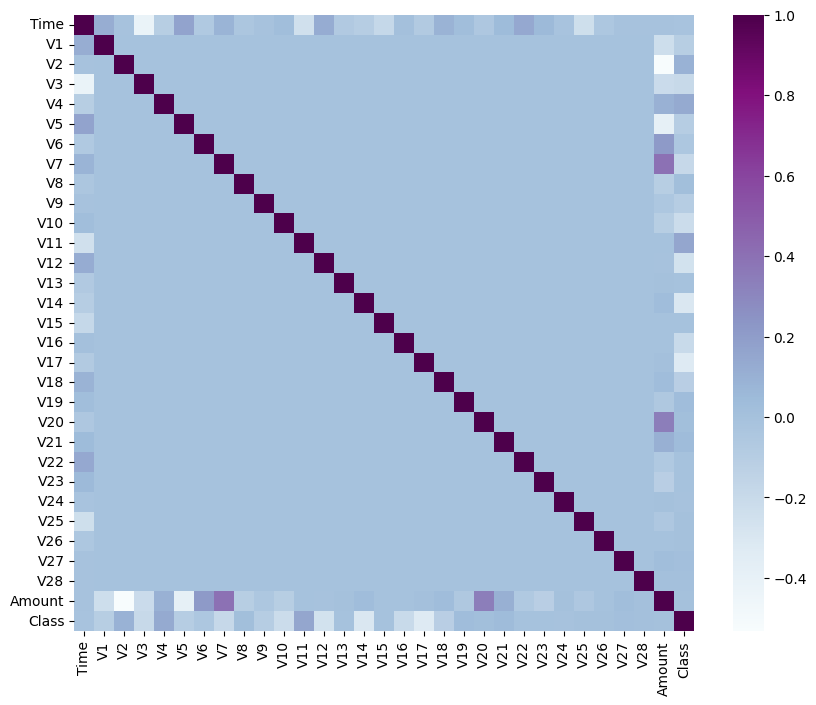

In [15]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr,cmap='BuPu')
plt.show()

**Model:1**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
x1=df.drop(['Class'],axis=1)
y1=df['Class']

In [18]:
y1.isnull().sum()

np.int64(0)

In [19]:
# Drop rows with missing values from both features and target
x1_cleaned = x1.dropna()
y1_cleaned = y1.dropna()

In [20]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1_cleaned,y1_cleaned,test_size=0.2,random_state=0)

In [21]:
lr= LogisticRegression()
model=lr.fit(x1_train,y1_train)

In [22]:
predition = model.predict(x1_test)

In [23]:
accuracy_score(y1_test,predition)

0.9989817773252344

**Model:2**

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
x2 = df.drop(['Class'],axis=1)

In [26]:
y2  = df['Class']

In [27]:
dt = DecisionTreeClassifier()

In [28]:
x2_clea = x1.dropna()
y2_clea = y1.dropna()

In [29]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2_clea,y2_clea,test_size=0.2,random_state=0)

In [30]:
model1 = dt.fit(x2_train,y2_train)

In [31]:
predition1 = model1.predict(x2_test)

In [32]:
accuracy_score(y2_test,predition1)

0.9991222218320986